# pyhf usage in Top FC 

Expected upper limits on signal strength using pyhf. There are three types of signals in these plots:

* Scalar like
* Vector like
* Tensor like

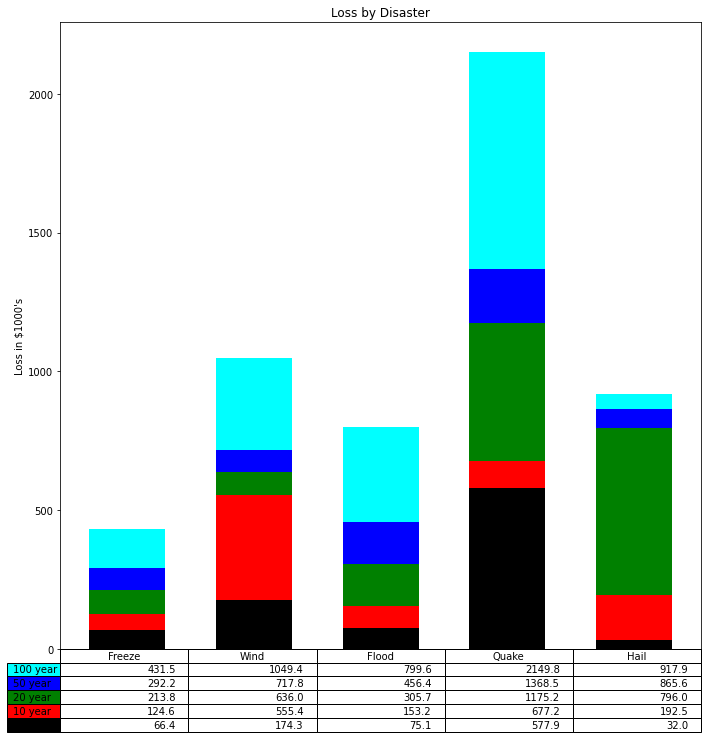

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import array
import ast

plt.figure(figsize=(10,10))
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
#colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
colors = ['black', 'red', 'green', 'blue', 'cyan']
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.6

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.01, bottom=0.01)

plt.ylabel(f"Loss in ${value_increment}'s")
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

In [28]:
import array
import ast

def array_to_list(CL):
    CL = CL.replace('array', '')
    CL = CL.replace('(', '')
    CL = CL.replace(')', '')

    CL = ast.literal_eval(CL)    
    return CL

test = '[array(0.18526298), array(0.23544205), array(0.29602205), array(0.39099281), array(0.48986435)]'
array_to_list(test)


[0.18526298, 0.23544205, 0.29602205, 0.39099281, 0.48986435]

In [276]:
import numpy as np
import matplotlib.pyplot as plt

def UL_plots(NN_low, NN_med, NN_high, x_title, weight_low, weight_med, weight_high, model, y_lim):
#def UL_plots():

    # Convert strings to lists
    NN_low = array_to_list(NN_low)
    NN_med = array_to_list(NN_med)
    NN_high = array_to_list(NN_high)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)


    # Calculate upper and lower limits for a 95% confidence level
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]
    upper_NN_low1 = [NN_low[3],NN_low[3]]
    lower_NN_low2 = [NN_low[0],NN_low[0]]
    upper_NN_low2 = [NN_low[4],NN_low[4]]

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]
    upper_NN_med1 = [NN_med[3],NN_med[3]]
    lower_NN_med2 = [NN_med[0],NN_med[0]]
    upper_NN_med2 = [NN_med[4],NN_med[4]]

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]
    upper_NN_high1 = [NN_high[3],NN_high[3]]
    lower_NN_high2 = [NN_high[0],NN_high[0]]
    upper_NN_high2 = [NN_high[4],NN_high[4]]    


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    plt.ylabel('Signal strength ($\mu$)')
    plt.ylim(y_lim)
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    plt.text(1, 0.9, '$\sqrt{s}$=13 TeV, L=3000 $fb^{-1}$\n{}'.format(model)) # Coordinates and text
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()

KeyError: 's'

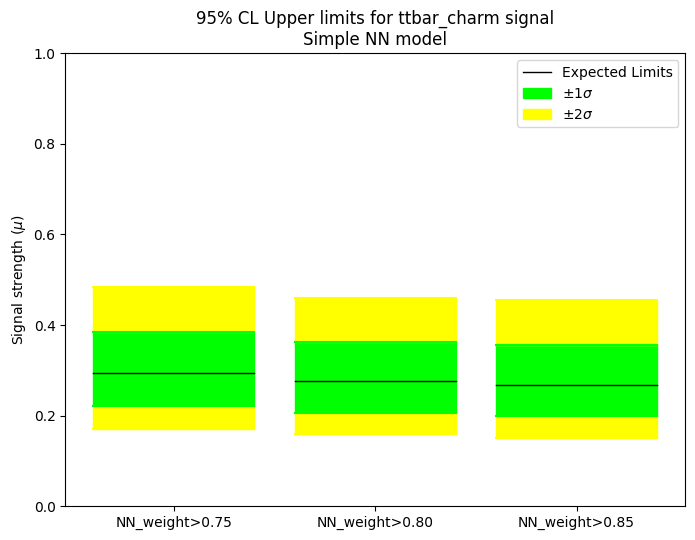

In [277]:
UL_plots('[array(0.16995817), array(0.22123871), array(0.29380828), array(0.38513289), array(0.48318188)]',
         '[array(0.15814555), array(0.20550003), array(0.27551894), array(0.36234972), array(0.45874746)]',
         '[array(0.15113915), array(0.19900695), array(0.26692745), array(0.35546054), array(0.45521384)]',
         'ttbar_charm', 'NN_weight>0.75', 'NN_weight>0.80', 'NN_weight>0.85', 'Simple NN model', [0,1])

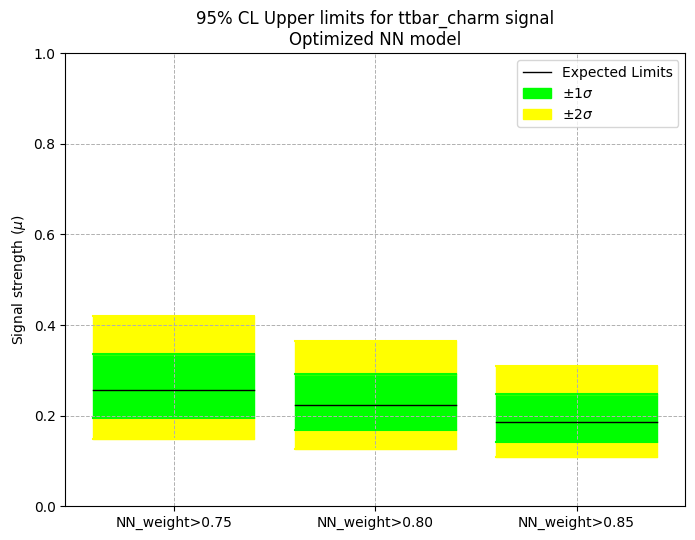

In [234]:
UL_plots('[array(0.14873523), array(0.19424455), array(0.25644373), array(0.33585532), array(0.42002072)]',
         '[array(0.12707925), array(0.16757882), array(0.22227411), array(0.29145953), array(0.36467137)]',
         '[array(0.10767591), array(0.1405507), array(0.18641008), array(0.2464848), array(0.30998985)]',
         'ttbar_charm', 'NN_weight>0.75', 'NN_weight>0.80', 'NN_weight>0.85', 'Optimized NN model', [0,1])

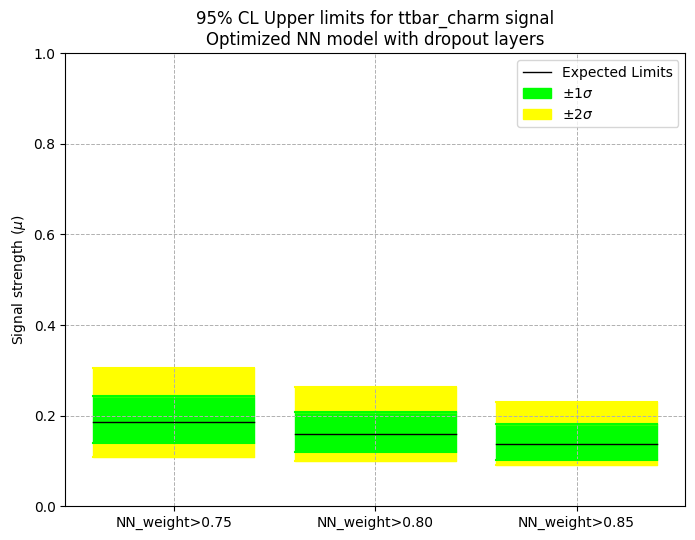

In [235]:
UL_plots('[array(0.10777805), array(0.1403877), array(0.1854143), array(0.24396336), array(0.30539504)]',
         '[array(0.1), array(0.11974006), array(0.15853882), array(0.20834614), array(0.2638776)]',
         '[array(0.09), array(0.10126216), array(0.13774739), array(0.18042478), array(0.23033588)]',
         'ttbar_charm', 'NN_weight>0.75', 'NN_weight>0.80', 'NN_weight>0.85', 'Optimized NN model with dropout layers', [0,1])

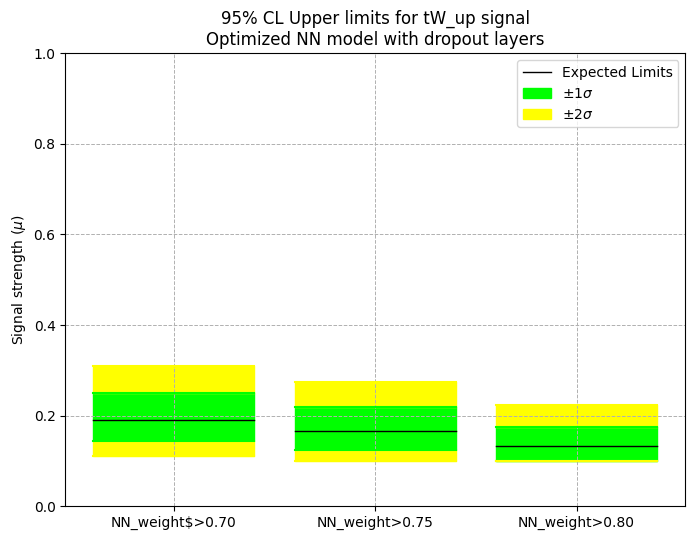

In [236]:
UL_plots('[array(0.11114868), array(0.14393388), array(0.19067895), array(0.24950321), array(0.31030417)]',
         '[array(0.1), array(0.12440445), array(0.16694065), array(0.21901415), array(0.27490902)]',
         '[array(0.1), array(0.1), array(0.13235679), array(0.17459352), array(0.22220566)]',
         'tW_up', 'NN_weight$>0.70', 'NN_weight>0.75', 'NN_weight>0.80', 'Optimized NN model with dropout layers', [0,1])

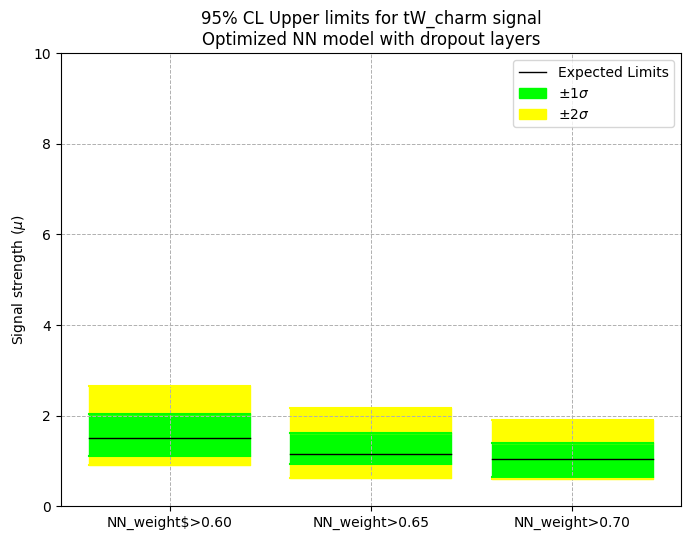

In [237]:
UL_plots('[array(0.90852024), array(1.11292963), array(1.51407632), array(2.02752408), array(2.65232309)]',
         '[array(0.63032381), array(0.92048802), array(1.14359213), array(1.61666895), array(2.16408637)]',
         '[array(0.60717916), array(0.6406899), array(1.03548178), array(1.39028829), array(1.90636366)]',
         'tW_charm', 'NN_weight$>0.60', 'NN_weight>0.65', 'NN_weight>0.70', 'Optimized NN model with dropout layers', [0,10])

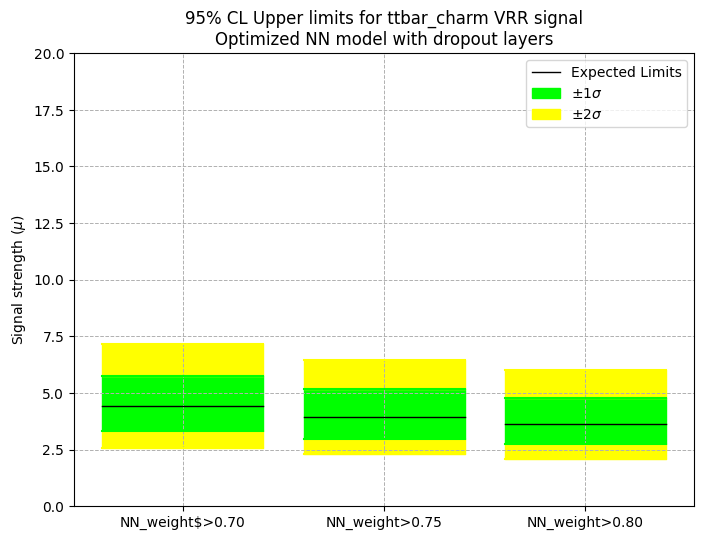

In [238]:
UL_plots('[array(2.55422787), array(3.32620989), array(4.41732855), array(5.76522565), array(7.16500134)]',
         '[array(2.2816063), array(2.97391385), array(3.94654435), array(5.16698866), array(6.44748672)]',
         '[array(2.09669706), array(2.73480403), array(3.64589365), array(4.78655079), array(6.00283274)]',
         'ttbar_charm VRR', 'NN_weight$>0.70', 'NN_weight>0.75', 'NN_weight>0.80', 'Optimized NN model with dropout layers', [0,20])

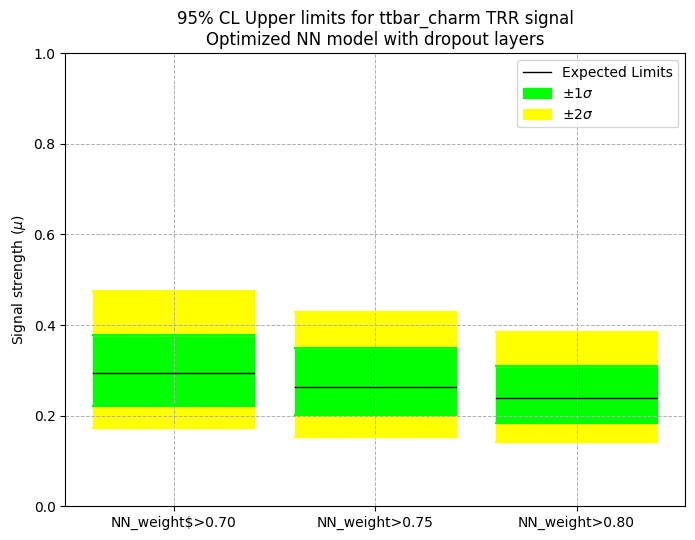

In [239]:
UL_plots('[array(0.17255878), array(0.22075815), array(0.29444444), array(0.37774075), array(0.4749654)]',
         '[array(0.15305498), array(0.20165954), array(0.2634241), array(0.34883998), array(0.42948169)]',
         '[array(0.14214937), array(0.18253698), array(0.23958449), array(0.31036259), array(0.38514362)]',
         'ttbar_charm TRR', 'NN_weight$>0.70', 'NN_weight>0.75', 'NN_weight>0.80', 'Optimized NN model with dropout layers', [0,1])